In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [14]:
NUM_CLASSES = 35

# Dataset reading

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 35)                385       
                                                                 
Total params: 1455 (5.68 KB)
Trainable params: 1455 (5.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
391/424 [==========================>...] - ETA: 0s - loss: 3.2063 - accuracy: 0.0993
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 3.1664 - accuracy: 0.1062 - val_loss: 2.3391 - val_accuracy: 0.4312
Epoch 2/1000
101/424 [======>.......................] - ETA: 0s - loss: 2.6184 - accuracy: 0.2029

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


398/424 [===========================>..] - ETA: 0s - loss: 2.4719 - accuracy: 0.2266
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 2.4632 - accuracy: 0.2283 - val_loss: 1.8071 - val_accuracy: 0.5391
Epoch 3/1000
394/424 [==========================>...] - ETA: 0s - loss: 2.2564 - accuracy: 0.2669
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 2.2523 - accuracy: 0.2678 - val_loss: 1.6462 - val_accuracy: 0.5906
Epoch 4/1000
397/424 [===========================>..] - ETA: 0s - loss: 2.1504 - accuracy: 0.2923
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 2.1468 - accuracy: 0.2933 - val_loss: 1.5444 - val_accuracy: 0.5877
Epoch 5/1000
413/424 [============================>.] - ETA: 0s - loss: 2.0796 - accuracy: 0.3135


Epoch 29/1000
401/424 [===========================>..] - ETA: 0s - loss: 1.5796 - accuracy: 0.4633
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 1.5780 - accuracy: 0.4641 - val_loss: 0.9530 - val_accuracy: 0.7596
Epoch 30/1000
404/424 [===========================>..] - ETA: 0s - loss: 1.5677 - accuracy: 0.4673
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 1.5660 - accuracy: 0.4680 - val_loss: 0.9514 - val_accuracy: 0.7684
Epoch 31/1000
404/424 [===========================>..] - ETA: 0s - loss: 1.5601 - accuracy: 0.4688
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 1.5593 - accuracy: 0.4690 - val_loss: 0.9557 - val_accuracy: 0.7439
Epoch 32/1000
401/424 [===========================>..] - ETA: 0s - loss: 1.5498

Epoch 56/1000
406/424 [===========================>..] - ETA: 0s - loss: 1.4966 - accuracy: 0.4902
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 1.4955 - accuracy: 0.4901 - val_loss: 0.9329 - val_accuracy: 0.7548
Epoch 57/1000
419/424 [============================>.] - ETA: 0s - loss: 1.4855 - accuracy: 0.4944
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 1.4861 - accuracy: 0.4942 - val_loss: 0.9536 - val_accuracy: 0.7299
Epoch 58/1000
411/424 [============================>.] - ETA: 0s - loss: 1.4769 - accuracy: 0.4967
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
424/424 [==============================] - 1s 2ms/step - loss: 1.4763 - accuracy: 0.4967 - val_loss: 0.9406 - val_accuracy: 0.7450
Epoch 58: early stopping


In [23]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

142/142 [==============================] - 0s 962us/step - loss: 0.9406 - accuracy: 0.7450


In [24]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [25]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 86ms/step
[5.43322498e-09 3.40750994e-04 6.62868842e-06 3.50738037e-06
 1.69047285e-02 6.42926607e-04 1.34394853e-03 4.29754582e-04
 7.39866029e-03 1.26552198e-03 1.30063277e-02 6.32855762e-03
 4.87615215e-03 2.99314997e-04 4.36228245e-01 9.10066813e-03
 1.04538564e-08 1.89008587e-10 2.41090584e-05 4.94375341e-09
 1.91528883e-07 2.48543568e-08 3.82526934e-01 4.31581363e-02
 7.48518435e-03 1.31028568e-14 2.43880762e-13 2.39745168e-05
 4.81820144e-02 1.69294048e-02 2.69779048e-05 3.36100534e-08
 1.11106405e-04 1.12862373e-03 2.22745677e-03]
14


# Confusion matrix

566/566 [==============================] - 0s 752us/step


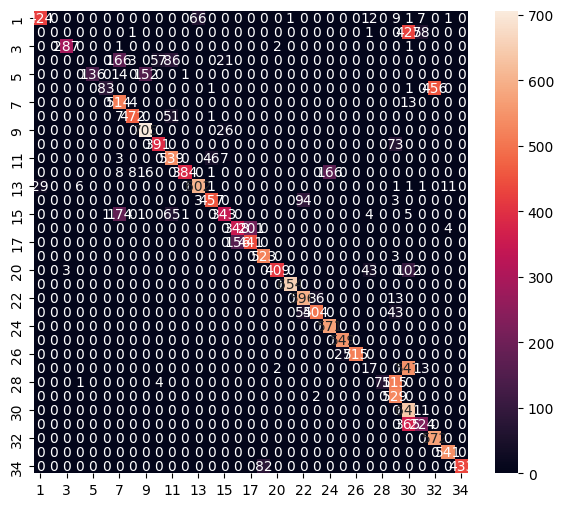

Classification Report
              precision    recall  f1-score   support

           1       0.94      0.81      0.87       521
           2       0.00      0.00      0.00       487
           3       0.99      0.99      0.99       291
           4       0.00      0.00      0.00       333
           5       1.00      0.45      0.62       303
           6       0.99      0.15      0.27       541
           7       0.58      0.97      0.72       531
           8       0.97      0.89      0.93       531
           9       0.80      0.96      0.87       731
          10       0.87      0.84      0.85       464
          11       0.73      0.91      0.81       595
          12       0.99      0.66      0.79       583
          13       0.90      0.92      0.91       652
          14       0.90      0.82      0.86       557
          15       0.86      0.57      0.69       603
          16       0.69      0.63      0.66       553
          17       0.69      0.74      0.71       597
     

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-d

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [27]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\khand\AppData\Local\Temp\tmpyhma67cy\assets


INFO:tensorflow:Assets written to: C:\Users\khand\AppData\Local\Temp\tmpyhma67cy\assets


7936

# Inference test

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 319 µs


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.4332316e-09 3.4075175e-04 6.6286907e-06 3.5073747e-06 1.6904714e-02
 6.4292469e-04 1.3439439e-03 4.2975269e-04 7.3986379e-03 1.2655188e-03
 1.3006332e-02 6.3285413e-03 4.8761466e-03 2.9931354e-04 4.3622798e-01
 9.1006551e-03 1.0453910e-08 1.8900884e-10 2.4109087e-05 4.9437601e-09
 1.9152931e-07 2.4854343e-08 3.8252741e-01 4.3158203e-02 7.4851797e-03
 1.3102848e-14 2.4388014e-13 2.3974591e-05 4.8182003e-02 1.6929410e-02
 2.6977761e-05 3.3610096e-08 1.1110580e-04 1.1286269e-03 2.2274565e-03]
14
